In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=123)

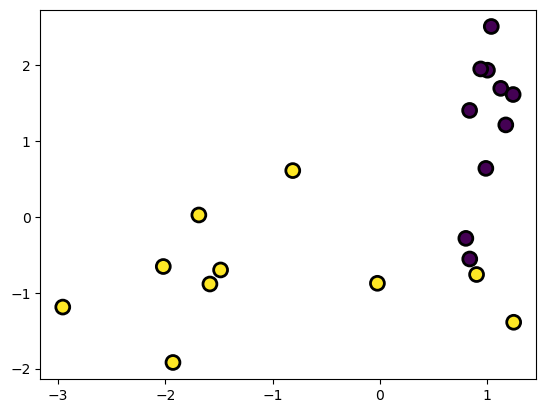

In [3]:
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.show()

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", random_state=1)
model.fit(X)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, random_state=1)

In [5]:
model.cluster_centers_

array([[ 1.01138251,  0.83200493],
       [-1.56258716, -0.69768199]])

In [6]:
pred = model.predict(X)
pred

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

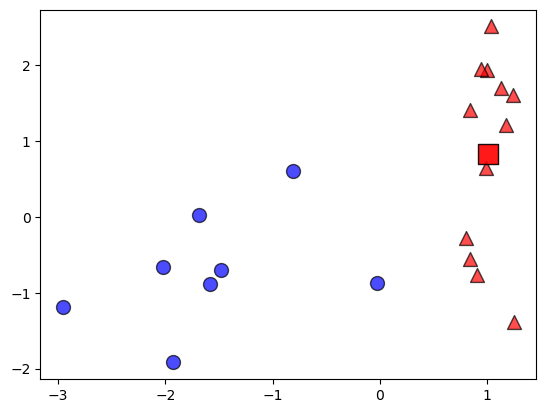

In [7]:
c0, c1 = model.cluster_centers_
plt.scatter(x=X[model.labels_==0,0], y=X[model.labels_==0, 1],
            s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
plt.scatter(x=X[model.labels_==1,0], y=X[model.labels_==1, 1],
            s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', marker='s', edgecolor='k', alpha=0.9)
plt.show()

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.c_[X,
                              np.linalg.norm(X-c0, axis=1),
                              np.linalg.norm(X-c1, axis=1),
                              model.labels_],
                  columns=['X0', 'X1', 'd0', 'd1', 'class'])

In [9]:
df.head()

,X0,X1,d0,d1,class
0,1.038596,2.511754,1.679969,4.131178,0.0
1,1.002714,1.935215,1.103245,3.675992,0.0
2,-1.688105,0.025994,2.817248,0.734481,1.0
3,0.901344,-0.758966,1.594771,2.464693,0.0
4,0.836531,1.404882,0.598967,3.190070,0.0


In [10]:
def plot_cluster(model, data):
    c0, c1 = model.cluster_centers_
    plt.scatter(x=data[model.labels_==0, 0], y=data[model.labels_==0, 1],
                s=100, marker='^', c='r', edgecolor='k', alpha=0.7)
    plt.scatter(x=data[model.labels_==1, 0], y=data[model.labels_==1, 1],
                s=100, marker='o', c='b', edgecolor='k', alpha=0.7)
    plt.scatter(x=c0[0], y=c0[1], s=200, c='r', marker='s', edgecolor='k', alpha=0.9)
    plt.scatter(x=c1[0], y=c1[1], s=200, c='b', marker='o', edgecolor='k', alpha=0.9)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

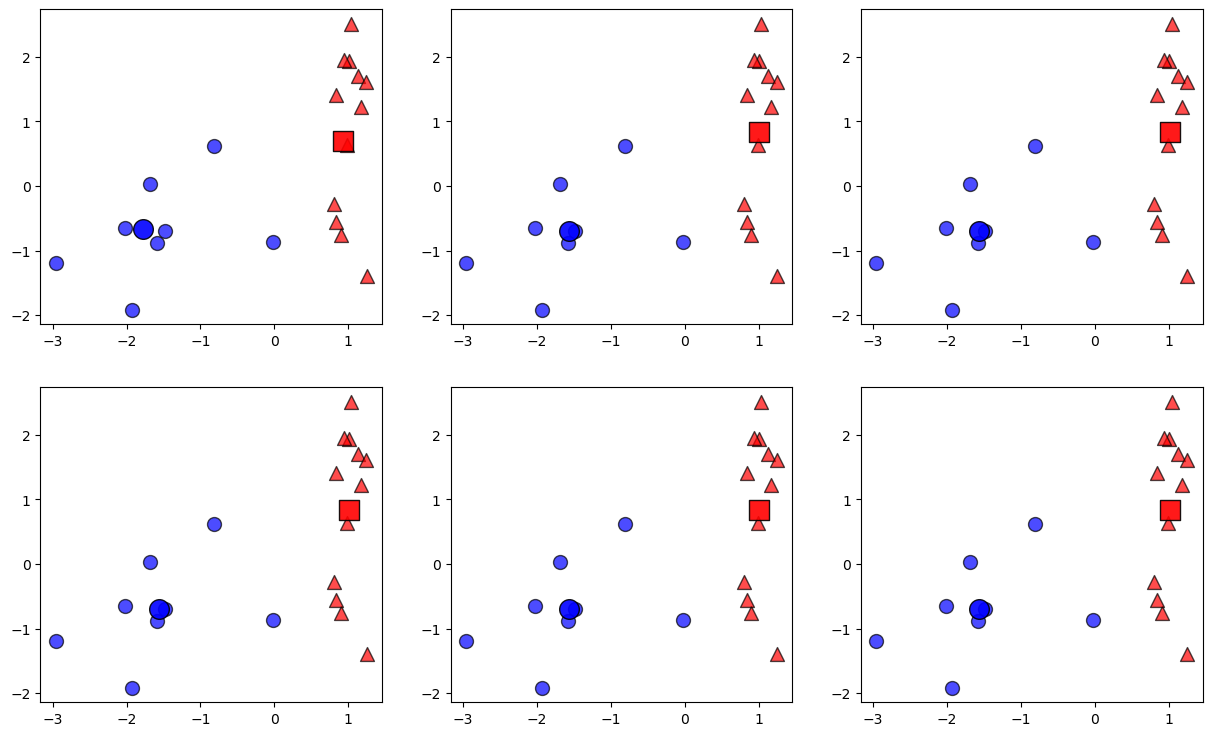

In [13]:
plt.figure(figsize=(15, 9))
for i in range(6):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=(i + 1), random_state=1)
    model.fit(X)
    plt.subplot(2,3,(i+1))
    plot_cluster(model, X)

In [14]:
model = KMeans(n_clusters=2, init="random", max_iter=3, n_init=5, verbose=1, random_state=1)
model.fit(X)

Initialization complete
Iteration 0, inertia 56.57259566663628.
Iteration 1, inertia 28.01642744888077.
Iteration 2, inertia 27.341546526436947.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 69.40411267658162.
Iteration 1, inertia 30.217873843504016.
Iteration 2, inertia 28.08659976426305.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 35.962382115903345.
Iteration 1, inertia 27.341546526436947.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 87.43567642286382.
Iteration 1, inertia 63.65086767457875.
Iteration 2, inertia 60.583930285651874.
Initialization complete
Iteration 0, inertia 164.57748693821844.
Iteration 1, inertia 37.65606157453839.
Iteration 2, inertia 28.08659976426305.
Converged at iteration 2: strict convergence.


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', max_iter=3, n_clusters=2, n_init=5, random_state=1,
       verbose=1)

In [15]:
model.score(X)

-27.341546526436947

In [16]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris_X = iris.iloc[:,:-1]
iris_y = iris.species
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
from sklearn.cluster import KMeans
iris_cluster_model = KMeans(n_clusters=3, random_state=1)
iris_cluster_model.fit(iris_X)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [18]:
iris_cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [19]:
import numpy as np
pred = np.choose(iris_cluster_model.labels_, [1, 0, 2])

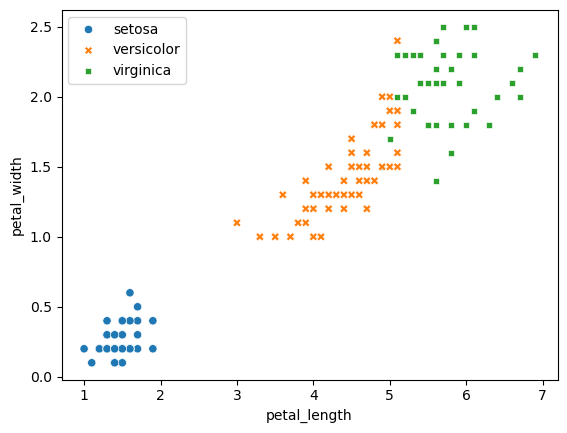

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris.species)
pred_str = le.inverse_transform(pred)
ax = sns.scatterplot(x="petal_length", y="petal_width", hue=pred_str, style=pred_str, data=iris)

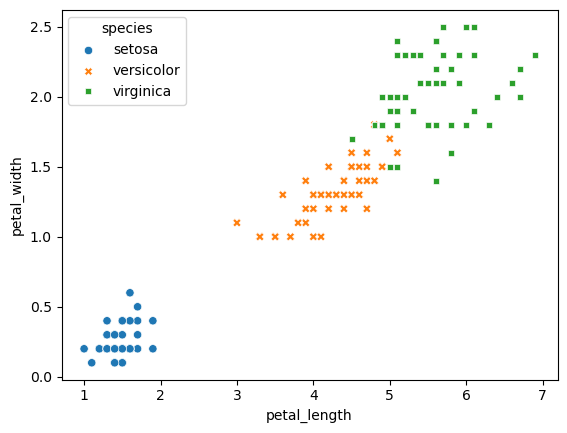

In [21]:
ax = sns.scatterplot(x="petal_length", y="petal_width", hue="species", style="species", data=iris)

In [23]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(-10, 2, (10,2))
class0 = np.full(group0.shape[0],0)
group0 = np.c_[group0, class0]

In [24]:
group1 = np.random.normal(10,2,(10,2))
class1 = np.full(group1.shape[0],1)
group1 = np.c_[group1, class1]

In [25]:
group2 = np.random.normal(0,5,(100,2))
class2 = np.full(group2.shape[0],2)
group2 = np.c_[group2, class2]

In [26]:
data = np.r_[group0, group1, group2]

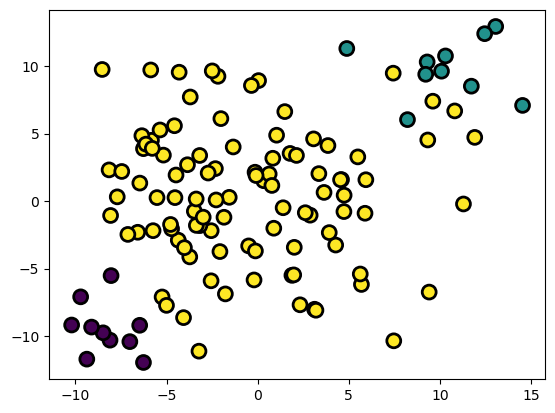

In [27]:
plt.scatter(x=data[:,0], y=data[:,1], marker='o', c=data[:,2].astype(int), s=100, edgecolor="k", linewidth=2)
plt.show()

In [29]:
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [30]:
pred = model.predict(data[:, 0:2])

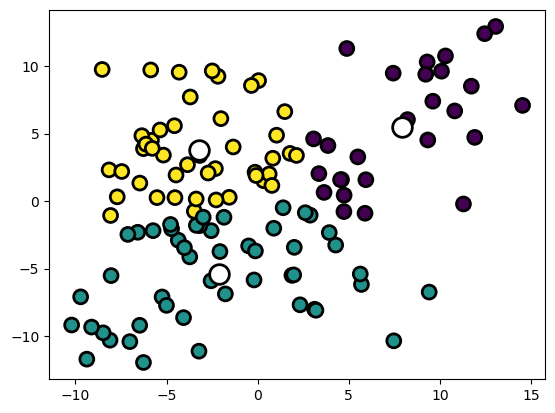

In [31]:
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolor="k", linewidth=2)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

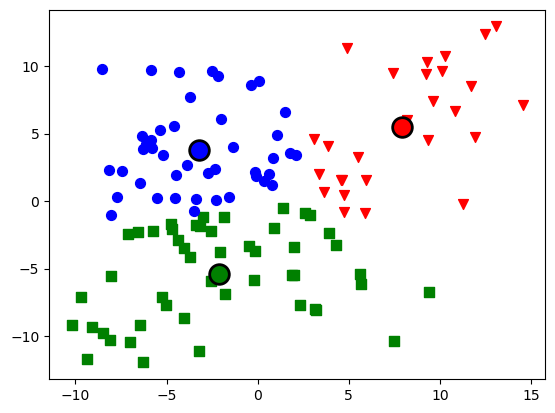

In [35]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0,0], y=data[model.labels_==0,1], s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1,0], y=data[model.labels_==1,1], s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2,0], y=data[model.labels_==2,1], s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

In [36]:
model = KMeans(n_clusters=6, init="random")
model.fit(data[:, 0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=6)

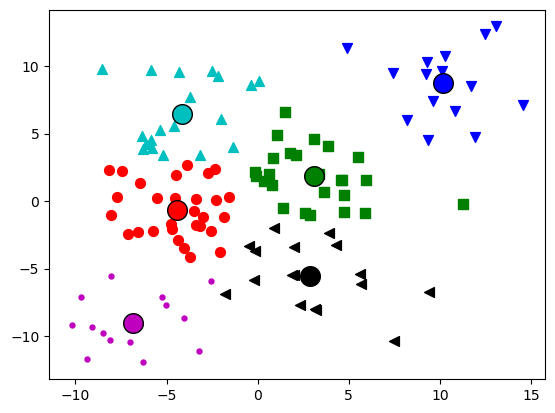

In [37]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m','k']
markers = ['o','s','v','^','.','<']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i,1], s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k')
plt.show()

In [38]:
import numpy as np
np.random.seed(0)
group0 = np.random.normal(13, 0.5, (50,2))
class0 = np.full(group0.shape[0],0)
group0 = np.c_[group0, class0]

In [39]:
group1 = np.random.normal(10, 1.5, (50,2))
class1 = np.full(group1.shape[0],1)
group1 = np.c_[group1, class1]

In [40]:
group2 = np.random.normal(0, 5, (50,2))
class2 = np.full(group2.shape[0],2)
group2 = np.c_[group2, class2]

In [41]:
data = np.r_[group0, group1, group2]

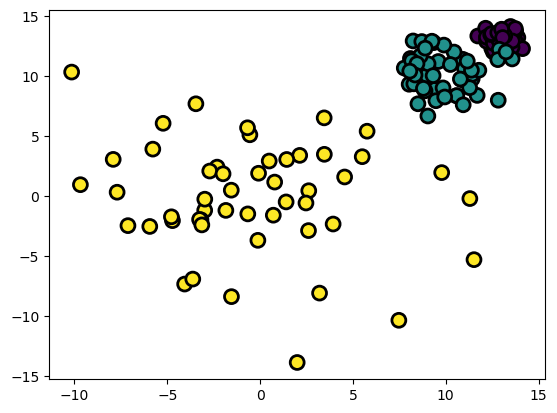

In [42]:
plt.scatter(x=data[:, 0], y=data[:,1], marker='o', c=data[:, 2].astype(int), s=100, edgecolor="k", linewidth=2)
plt.show()

In [43]:
model = KMeans(n_clusters=3, init="random")
model.fit(data[:, 0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3)

In [44]:
pred = model.predict(data[:, 0:2])

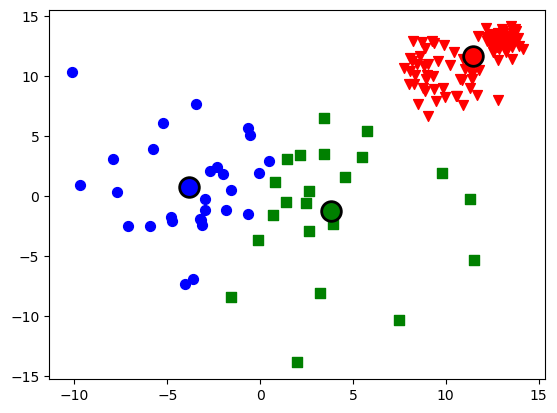

In [45]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0,0], y=data[model.labels_==0,1], s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1,0], y=data[model.labels_==1,1], s=50, marker='s', c='g')
plt.scatter(x=data[model.labels_==2,0], y=data[model.labels_==2,1], s=50, marker='o', c='b')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.scatter(x=c2[0], y=c2[1], s=200, c='b', edgecolor='k', linewidth=2)
plt.show()

In [47]:
model = KMeans(n_clusters=5, init="random")
model.fit(data[:,0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=5)

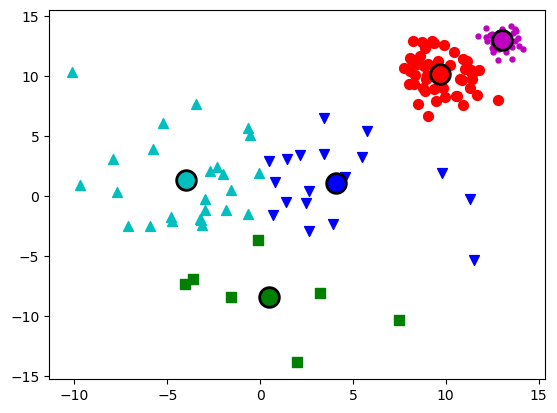

In [48]:
centers = model.cluster_centers_
colors = ['r','g','b','c','m']
markers = ['o','s','v','^','.']
for i, c in enumerate(centers):
    plt.scatter(x=data[model.labels_==i, 0], y=data[model.labels_==i,1], s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c=colors[i], edgecolor='k', linewidth=2)
plt.show()

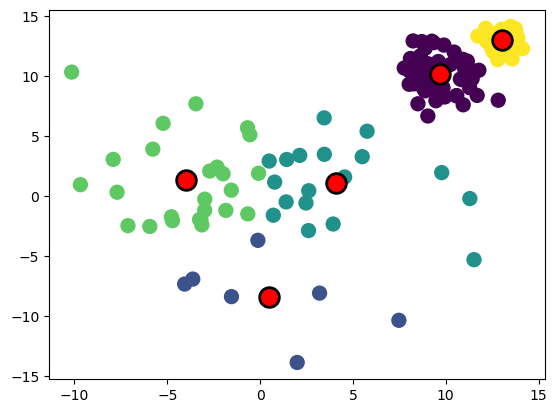

In [49]:
pred = model.predict(data[:,0:2])
c = model.cluster_centers_
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=c[:,0], y=c[:,1], s=200, c='r', edgecolor='k', linewidth=2)
plt.show()

In [50]:
import numpy as np
np.random.seed(0)
X1 = np.random.rand(200)*3
noise = np.random.normal(0, 0.2, X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise

group1 = np.c_[X1, Y1, np.full(X1.shape[0], 0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0], 1)]
data = np.r_[group1, group2]

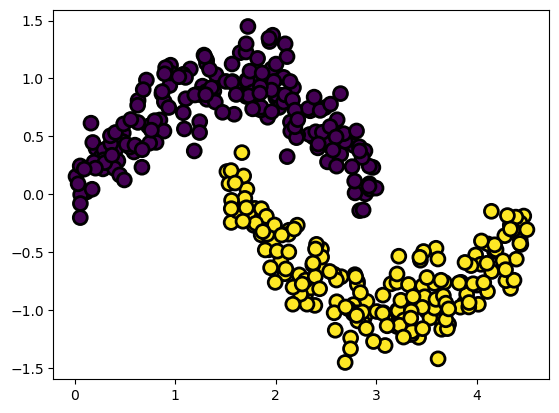

In [51]:
plt.scatter(x=data[:, 0], y=data[:,1], marker='o', c=data[:, 2].astype(int), s=100, edgecolor="k", linewidth=2)
plt.show()

In [52]:
model = KMeans(n_clusters=2, init="random")
model.fit(data[:,0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2)

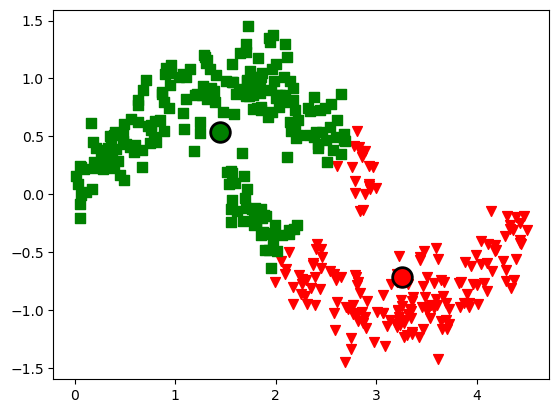

In [53]:
c0, c1 = model.cluster_centers_
plt.scatter(x=data[model.labels_==0,0], y=data[model.labels_==0,1],s=50, marker='v', c='r')
plt.scatter(x=data[model.labels_==1,0], y=data[model.labels_==1,1],s=50, marker='s', c='g')
plt.scatter(x=c0[0], y=c0[1], s=200, c='r', edgecolor='k', linewidth=2)
plt.scatter(x=c1[0], y=c1[1], s=200, c='g', edgecolor='k', linewidth=2)
plt.show()

In [54]:
model = KMeans(n_clusters=7, init="random", random_state=2)
model.fit(data[:,0:2])

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=7, random_state=2)

In [55]:
center = model.cluster_centers_
colors=['r','g','b','c','m','y','k']
markers = ['o','s','v','^','.','*','<']

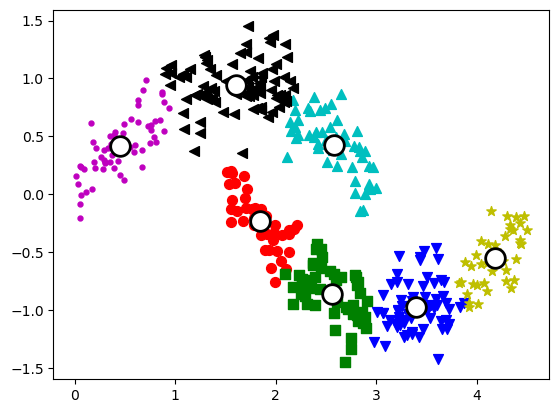

In [56]:
for i, c in enumerate(center):
    plt.scatter(x=data[model.labels_==i,0], y=data[model.labels_==i, 1], s=50, marker=markers[i], c=colors[i])
    plt.scatter(x=c[0], y=c[1], s=200, c='w', edgecolor='k', linewidth=2)
plt.show()

In [58]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = model.fit_predict(data[:, :-1])
    score = silhouette_score(data[:,:-1], cluster_labels)
    print(f"클러스터 수 : {n_clusters}, 실루엣 계수 : {score}")

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 2, 실루엣 계수 : 0.533235774308134


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 3, 실루엣 계수 : 0.4701230677079941


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 4, 실루엣 계수 : 0.4732502498237369


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 5, 실루엣 계수 : 0.45962085906799105


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 6, 실루엣 계수 : 0.49827095148830175


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 7, 실루엣 계수 : 0.5027363876263838


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 8, 실루엣 계수 : 0.4918697936848558


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 9, 실루엣 계수 : 0.47303667875323785


C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


클러스터 수 : 10, 실루엣 계수 : 0.4504109748038108


In [59]:
X1 = np.random.rand(200)*3
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1) + noise

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group1 = np.c_[X1, Y1, np.full(X1.shape[0],0)]
group2 = np.c_[X2, Y2, np.full(X2.shape[0],1)]
data = np.r_[group1, group2]

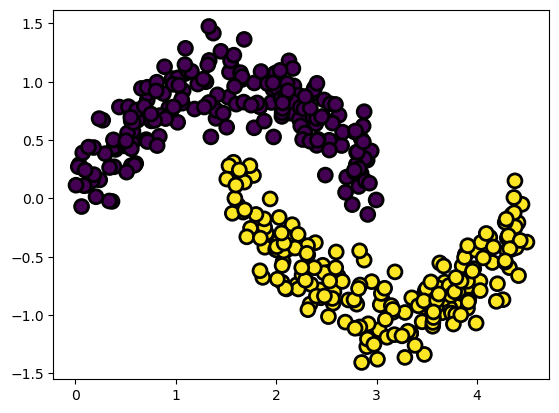

In [60]:
plt.scatter(x=data[:,0], y=data[:,1], marker='o', c=data[:,2].astype(int), s=100, edgecolor='k', linewidth=2)
plt.show()